In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/apps.csv')

In [ ]:
print(df.info())

print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB
None
          Unnamed: 0                                             App Category  \
count    9659.000000    

In [ ]:
# Sentiment Analysis: Analyzing text data to determine the emotional tone, whether positive, negative, or neutral

In [ ]:
from textblob import TextBlob
# Function to analyze sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis on the 'Reviews' column
df['Sentiment'] = df['Reviews'].apply(lambda x: analyze_sentiment(str(x)))

# Display the first few rows of the dataframe with the new Sentiment column
print(df.head())

# Save the updated dataframe to a new CSV file
df.to_csv('/content/drive/MyDrive/apps.csv', index=False)


   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967  2.8M     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [ ]:
# Natural Language Processing (NLP): Utilizing algorithms and models to understand and process human language

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lower case
    tokens = [word.lower() for word in tokens]

    # Remove punctuation
    words = [word for word in tokens if word.isalnum()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    return ' '.join(words)

In [ ]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
# Apply text preprocessing
df['Processed_Reviews'] = df['Reviews'].astype(str).apply(preprocess_text)

# Apply sentiment analysis
df['Sentiment'] = df['Processed_Reviews'].apply(analyze_sentiment)

# Display the first few rows of the dataframe with the new columns
print(df.head())

# Save the updated dataframe to a new CSV file
df.to_csv('app_data_with_sentiment.csv', index=False)

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967  2.8M     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [ ]:
# Machine Learning Algorithms: Implementing models for sentiment classification, such as Support Vector Machines, Naive Bayes, or deep learning architectures

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lower case
    tokens = [word.lower() for word in tokens]

    # Remove punctuation
    words = [word for word in tokens if word.isalnum()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    return ' '.join(words)

In [ ]:
# Apply text preprocessing
df['Processed_Reviews'] = df['Reviews'].astype(str).apply(preprocess_text)

In [ ]:
# Use TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Reviews'])

In [ ]:
def get_sentiment_label(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 1  # Positive
    elif analysis.sentiment.polarity == 0:
        return 0  # Neutral
    else:
        return -1  # Negative

df['Sentiment'] = df['Reviews'].apply(lambda x: get_sentiment_label(str(x)))
y = df['Sentiment']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 1.0
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932

    accuracy                           1.00      1932
   macro avg       1.00      1.00      1.00      1932
weighted avg       1.00      1.00      1.00      1932



In [ ]:
# Feature Engineering: Identifying and extracting relevant features from text data to enhance model performance

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Convert to lower case
    tokens = [word.lower() for word in tokens]

    # Remove punctuation
    words = [word for word in tokens if word.isalnum()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    return ' '.join(words)

# Apply text preprocessing
df['Processed_Reviews'] = df['Reviews'].astype(str).apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Use TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['Processed_Reviews'])

In [ ]:
# Additional features
df['Word_Count'] = df['Processed_Reviews'].apply(lambda x: len(x.split()))
df['Char_Count'] = df['Processed_Reviews'].apply(lambda x: len(x))
df['Avg_Word_Length'] = df['Processed_Reviews'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

# Combine TF-IDF features with additional features
import scipy.sparse as sp

# Convert additional features to a sparse matrix
X_additional = sp.csr_matrix(df[['Word_Count', 'Char_Count', 'Avg_Word_Length']].values)

# Combine TF-IDF features with additional features
X_combined = sp.hstack([X_tfidf, X_additional])

In [ ]:
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
from nltk.chunk import tree2conlltags

# Download necessary NLTK data files for POS tagging and named entity recognition
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def extract_pos_features(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return ' '.join([tag for word, tag in pos_tags])

def extract_named_entities(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    chunks = ne_chunk(pos_tags)
    named_entities = [' '.join(leaf[0] for leaf in tree.leaves())
                      for tree in chunks
                      if hasattr(tree, 'label')]
    return ' '.join(named_entities)

df['POS_Tags'] = df['Processed_Reviews'].apply(extract_pos_features)
df['Named_Entities'] = df['Processed_Reviews'].apply(extract_named_entities)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
# Data Visualization: Presenting sentiment analysis results through effective visualizations for clear interpretation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

<ipython-input-28-2b2ae3f05a4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


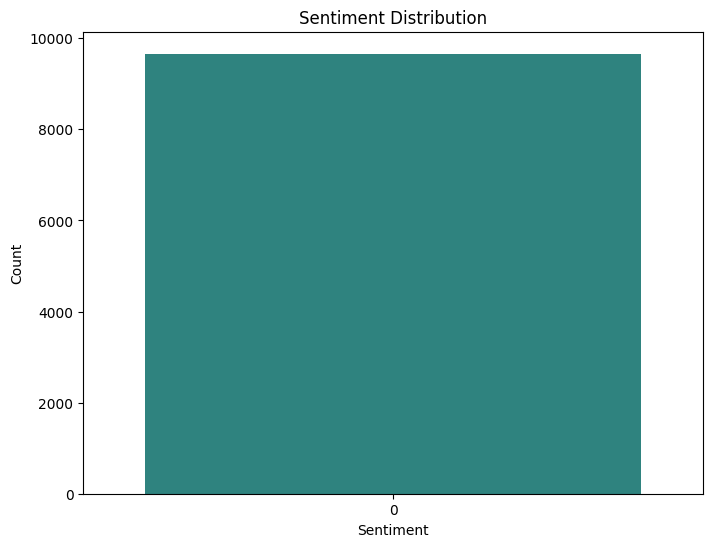

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

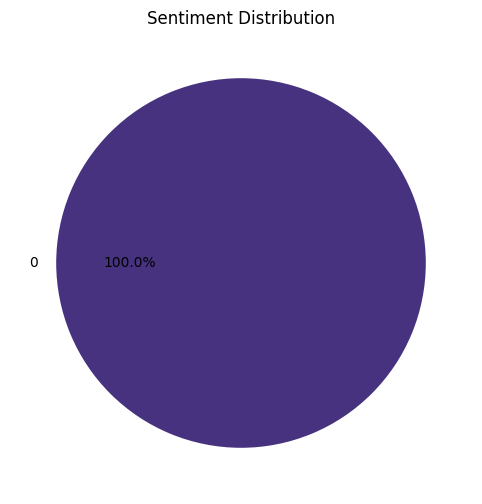

In [ ]:

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Sentiment Distribution')
plt.show()

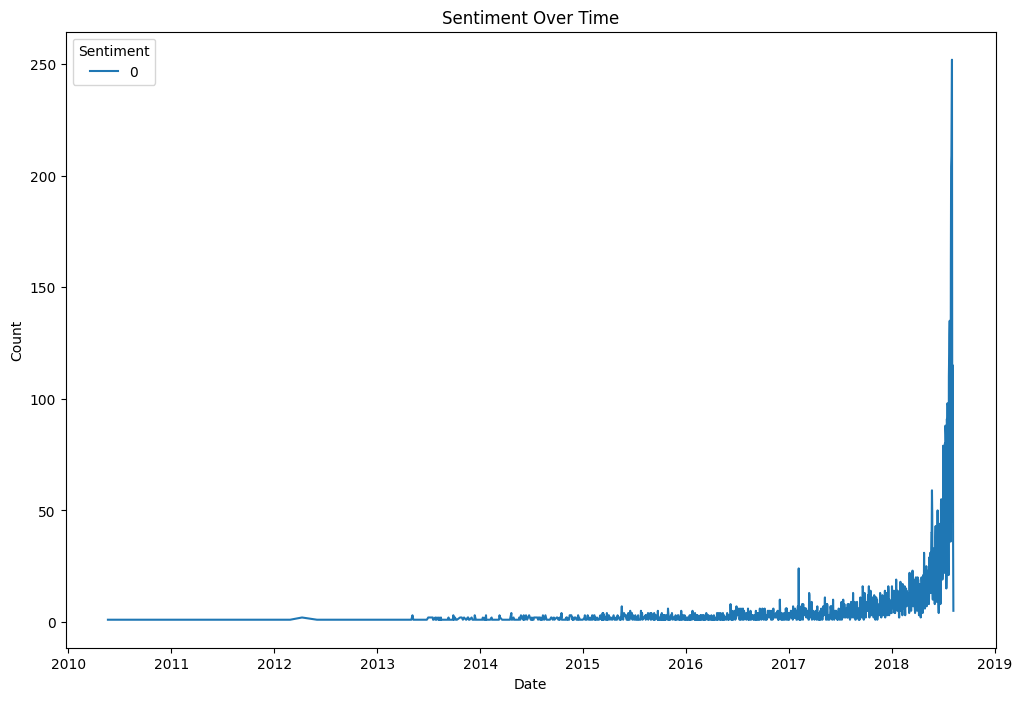

In [ ]:
# Convert 'Last Updated' to datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Aggregate sentiment counts by date
sentiment_over_time = df.groupby([df['Last Updated'].dt.date, 'Sentiment']).size().unstack(fill_value=0)

# Plot sentiment over time
plt.figure(figsize=(12, 8))
sentiment_over_time.plot(kind='line', ax=plt.gca())
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

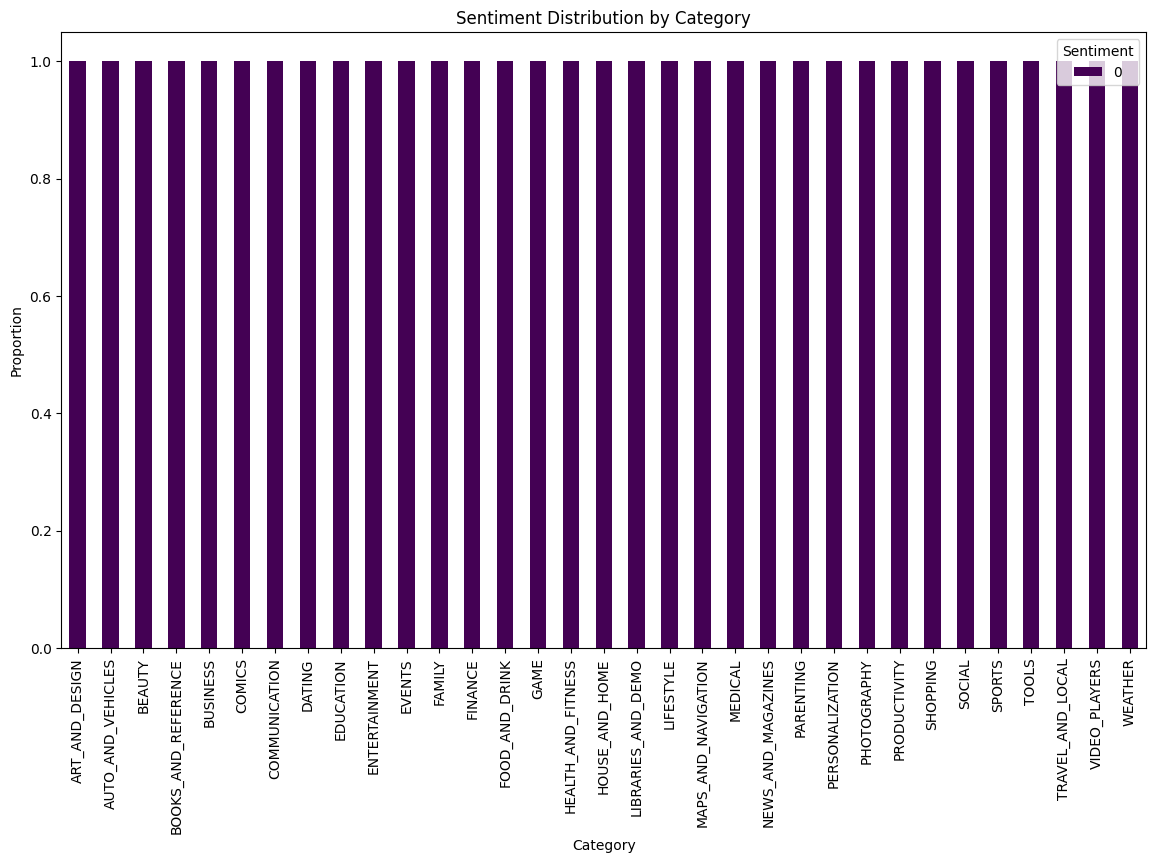

In [ ]:
# Average sentiment score by category
category_sentiment = df.groupby('Category')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(14, 8))
category_sentiment.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()